In [178]:
import pandas as pd
from sklearn.decomposition import PCA

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

data = pd.read_csv("top50.csv")

In [179]:
GenreVals = data['Genre'].values
for i in range(len(GenreVals)):
    if 'pop' in GenreVals[i]:
        GenreVals[i] = 'pop'
    elif 'hip hop' in GenreVals[i] or 'trap' in GenreVals[i] or 'rap' in GenreVals[i]:
        GenreVals[i] = 'rap'
    elif 'reggaeton' in GenreVals[i]:
        GenreVals[i] = 'reggaeton'

In [180]:
# matches indices of songs with genres

track = []
for i in GenreVals:
    if not(i in track):
        track.append(i)
GenreDict = {}

for i in track:
    GenreDict[i] = []

for i in range(len(GenreVals)):
    GenreDict[GenreVals[i]].append(i) # groups indices of songs with genres

print(GenreDict) 

{'pop': [0, 2, 3, 5, 7, 9, 11, 12, 13, 15, 20, 24, 25, 26, 31, 34, 36, 37, 39, 41, 42, 43, 49], 'reggaeton': [1, 10, 22, 32], 'rap': [4, 6, 8, 14, 17, 18, 21, 27, 33], 'latin': [16, 23, 28, 29, 46], 'escape room': [19], 'edm': [30, 40, 48], 'big room': [35], 'boy band': [38], 'r&b en espanol': [44], 'brostep': [45, 47]}


In [181]:
data.drop('Genre', inplace=True, axis=1)
data.drop('Track.Num', inplace=True, axis=1) # takes out track number and genre from data

In [182]:
songs = data['Track.Name'].values
artists = data['Artist.Name'].values
Xdata = []

for i in range(len(songs)):
    Xdata.append([songs[i], artists[i]]) # creates Xdata list with song and artist of each datapoint

#Xdata = pd.DataFrame(Xdata, columns=['Track.Name','Artist.Name'])

ydata = data
ydata.drop('Track.Name', inplace=True, axis=1)
ydata.drop('Artist.Name', inplace=True, axis=1) # creates y data dataframe; same as data except without track and artist names


#print(Xdata)
#print(ydata)

In [183]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(ydata) # converts ydata to 3 variabes


'''
for i in range(len(Xdata)):
    print(Xdata[i], '  ', pca_result[i])
'''

"\nfor i in range(len(Xdata)):\n    print(Xdata[i], '  ', pca_result[i])\n"

/var/folders/k0/4j_3xmsj5318lx3sbl7l72tw80k58g/T/ipykernel_32063/2983029835.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


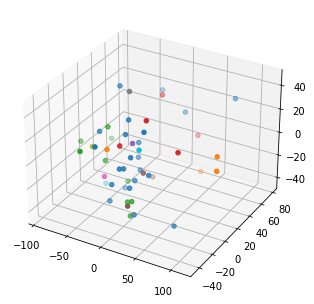

In [184]:
fig = plt.figure()
ax = Axes3D(fig)

#ax.scatter(xs, ys, zs)

for genre in GenreDict:
    indexList = GenreDict[genre]
    otherList = [pca_result[i] for i in indexList]
    xs = [i[0] for i in otherList]
    ys = [i[1] for i in otherList]
    zs = [i[2] for i in otherList]
    ax.scatter(xs, ys, zs) # plots all points grouped by genre
